In [1]:
import yt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
plt.style.use('default')

In [2]:
num = 220

In [3]:
ds = yt.load('/data/yhgong/galaxy_cluster_merger/refine150_150kpc_gas2/perseus_merger_hdf5_plt_cnt_%04d'%num)

yt : [INFO     ] 2022-12-19 23:31:06,425 Parameters: current_time              = 1.2629044052833584e+16
yt : [INFO     ] 2022-12-19 23:31:06,427 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-12-19 23:31:06,429 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2022-12-19 23:31:06,431 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2022-12-19 23:31:06,432 Parameters: cosmological_simulation   = 0


### Temperature

yt : [INFO     ] 2022-12-19 19:33:32,071 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:33:32,073 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:33:32,076 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:33:32,077 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:33:32,080 Making a fixed resolution buffer of (('flash', 'temp')) 800 by 800



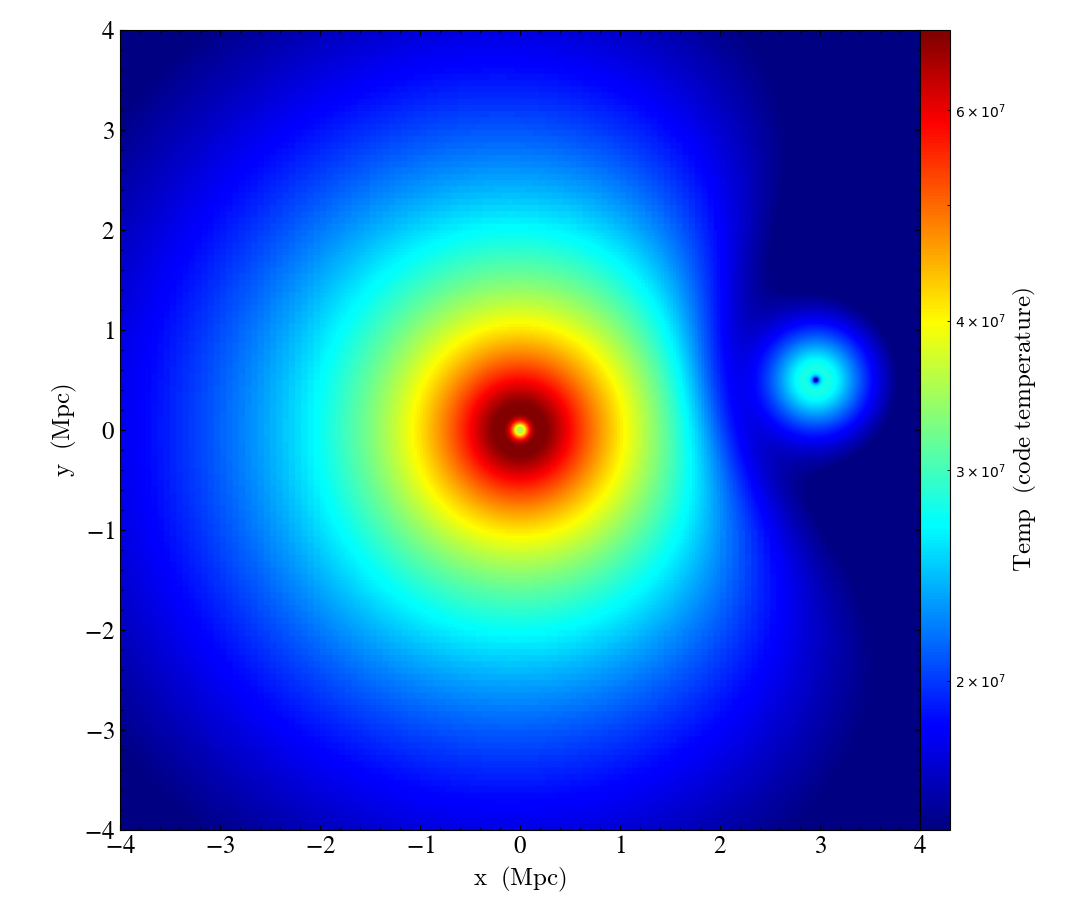

In [21]:
# 180
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','temp')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'temp')], 'Blue-Red')
p.set_zlim(('flash', 'temp'), 1.5e7, 7e7)
p.show()

yt : [INFO     ] 2022-12-19 23:31:21,656 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 23:31:21,660 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 23:31:21,662 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 23:31:21,663 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 23:31:21,666 Making a fixed resolution buffer of (('flash', 'temp')) 800 by 800



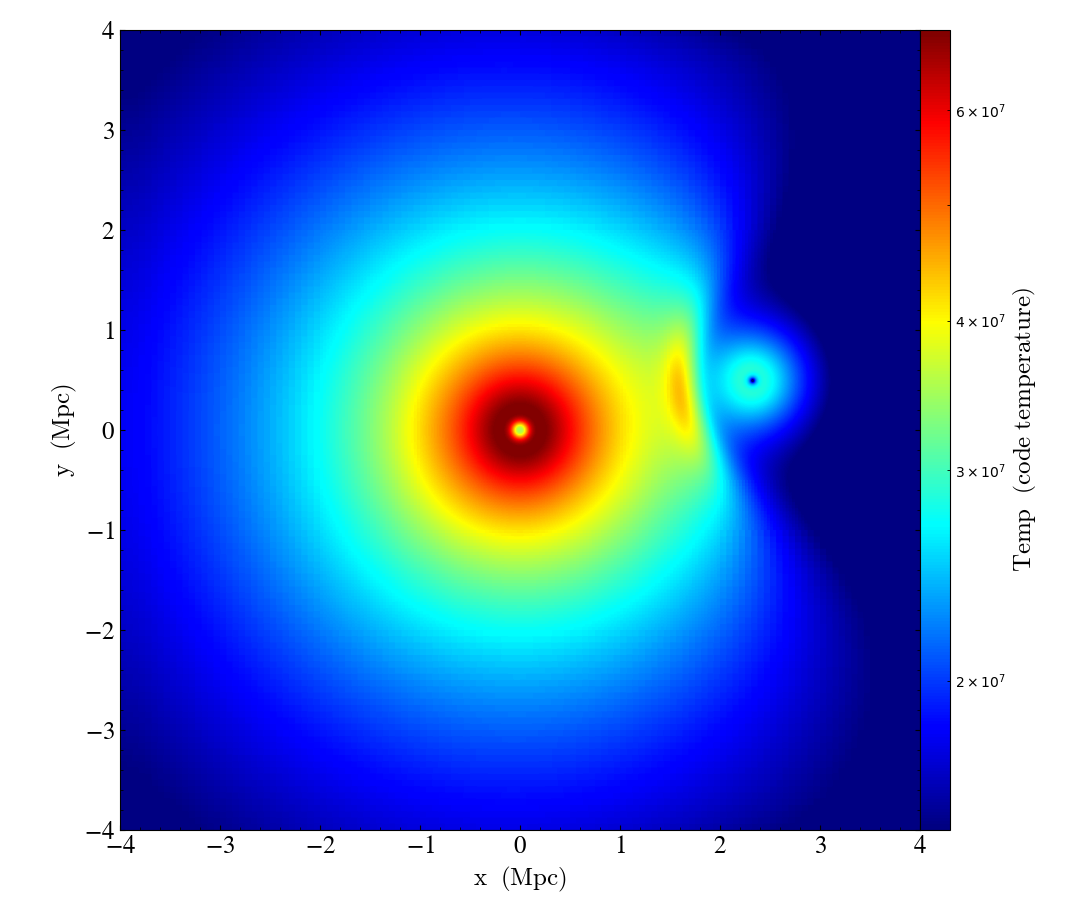

In [4]:
# 220
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','temp')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'temp')], 'Blue-Red')
p.set_zlim(('flash', 'temp'), 1.5e7, 7e7)
p.show()

### Gas density

yt : [INFO     ] 2022-12-19 19:32:26,685 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:32:26,687 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:32:26,690 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:32:26,691 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:32:26,695 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800



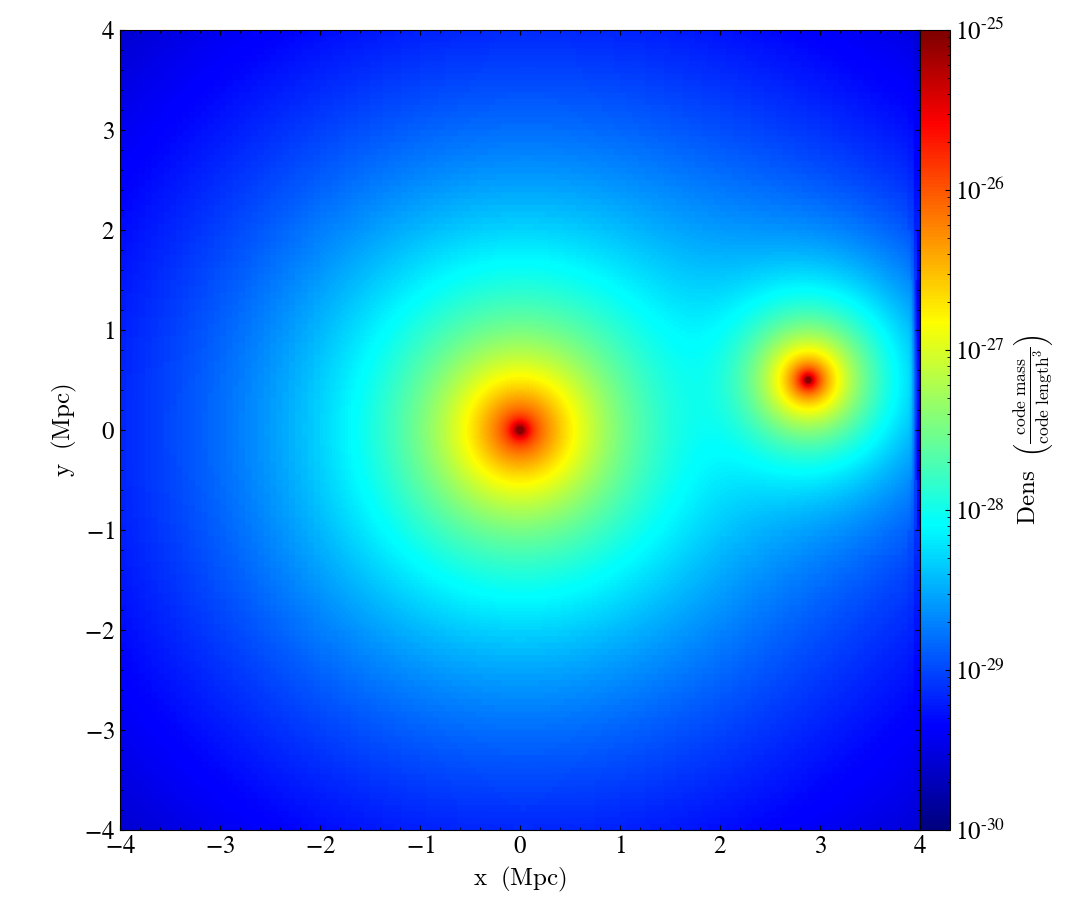

In [13]:
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','dens')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'dens')], 'Blue-Red')
p.set_zlim(('flash', 'dens'), 1e-30, 1e-25)
p.show()

yt : [INFO     ] 2022-12-19 23:32:31,575 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 23:32:31,577 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 23:32:31,579 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 23:32:31,580 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 23:32:31,582 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800



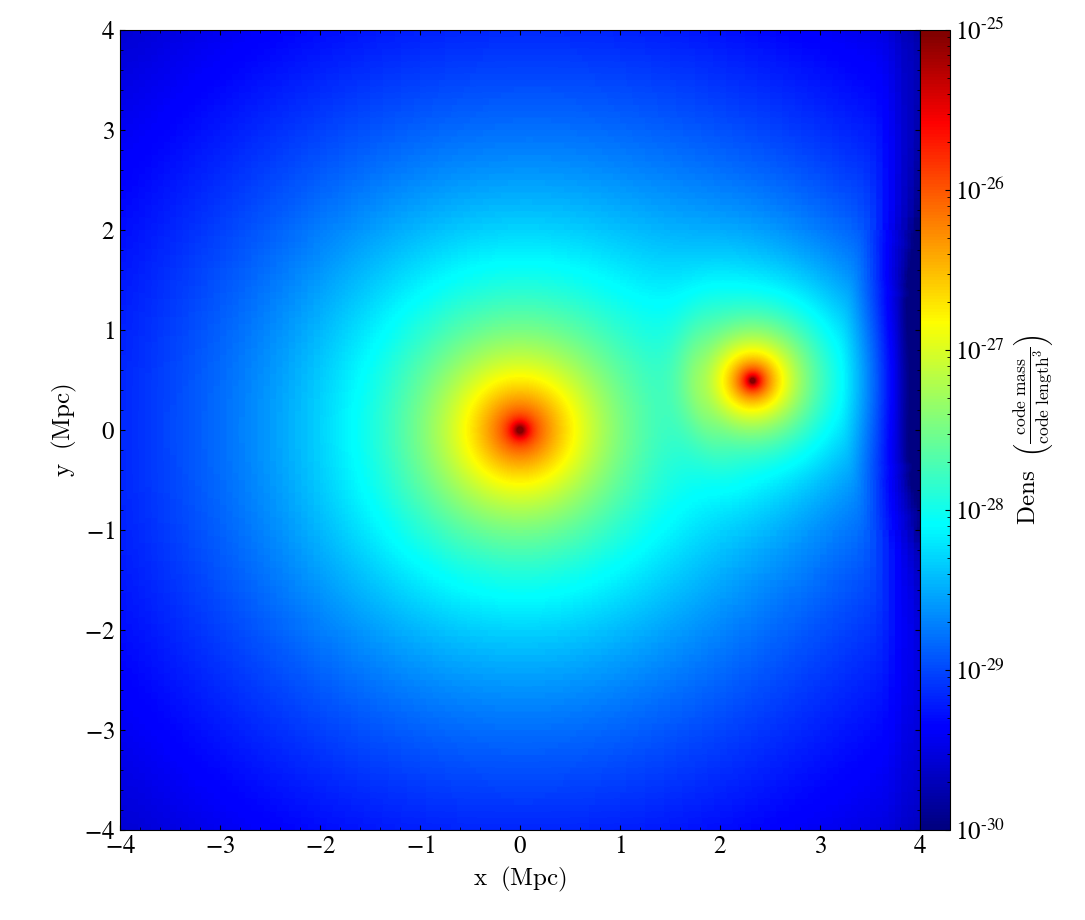

In [6]:
# 220
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','dens')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'dens')], 'Blue-Red')
p.set_zlim(('flash', 'dens'), 1e-30, 1e-25)
p.show()

### Pressure

yt : [INFO     ] 2022-12-19 19:32:36,090 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:32:36,092 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:32:36,095 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:32:36,096 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:32:36,100 Making a fixed resolution buffer of (('flash', 'pres')) 800 by 800



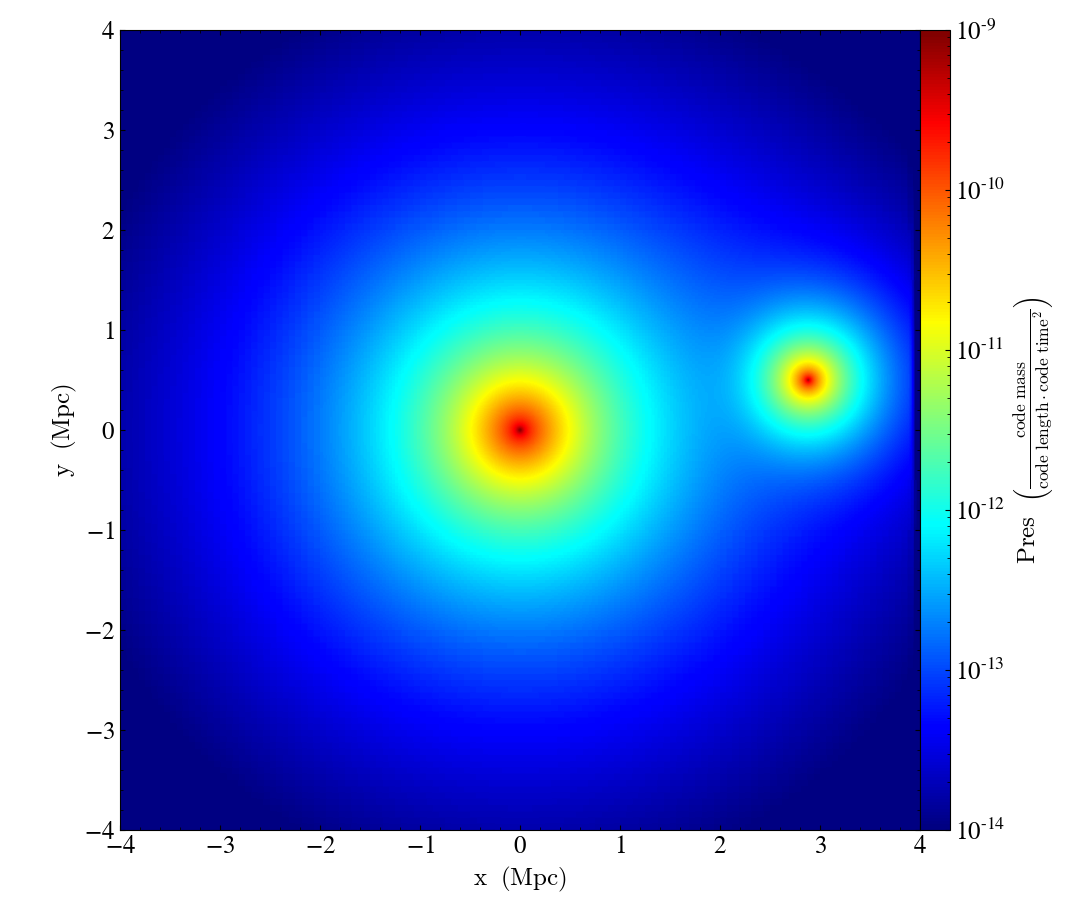

In [14]:
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','pres')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'pres')], 'Blue-Red')
p.set_zlim(('flash', 'pres'), 1e-14, 1e-9)
p.show()

yt : [INFO     ] 2022-12-19 23:32:50,803 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 23:32:50,805 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 23:32:50,807 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 23:32:50,807 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 23:32:50,810 Making a fixed resolution buffer of (('flash', 'pres')) 800 by 800



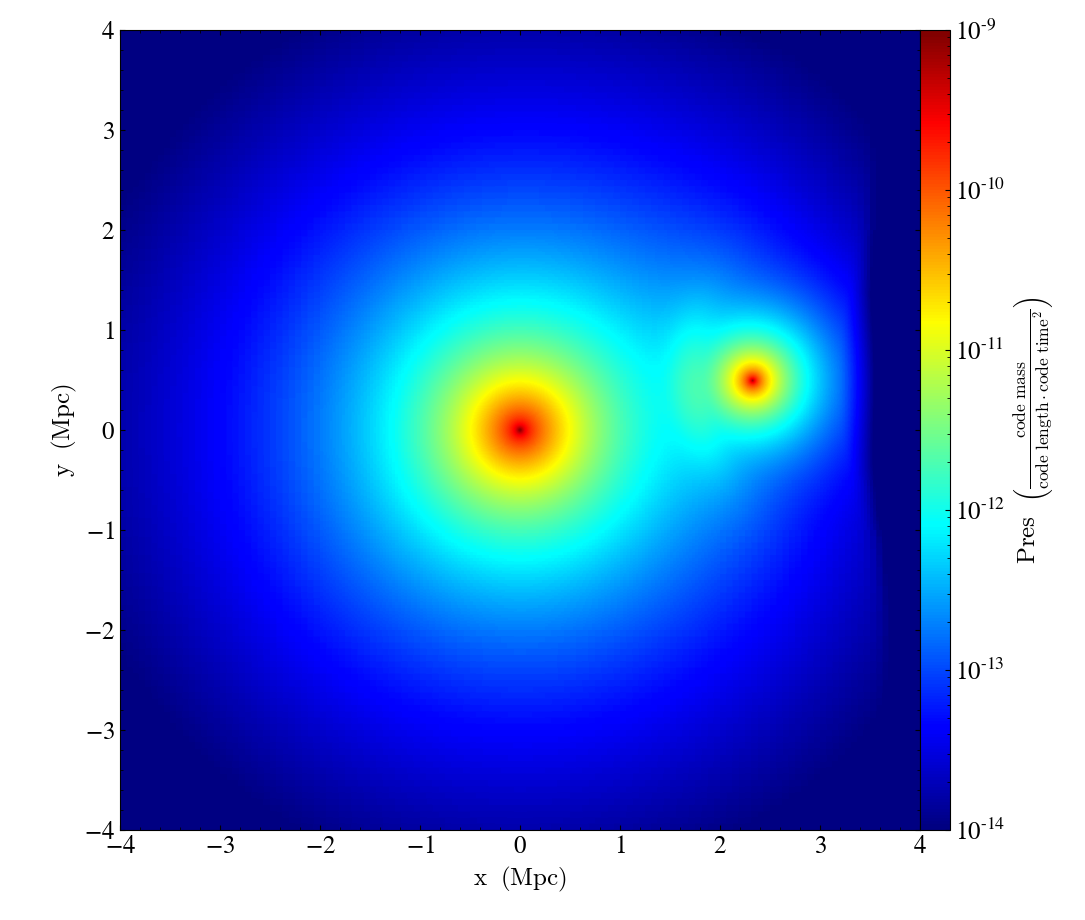

In [7]:
# 220
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','pres')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'pres')], 'Blue-Red')
p.set_zlim(('flash', 'pres'), 1e-14, 1e-9)
p.show()

### Gravatational Potential

yt : [INFO     ] 2022-12-19 19:32:41,628 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:32:41,630 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:32:41,633 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:32:41,635 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-19 19:32:41,640 Making a fixed resolution buffer of (('flash', 'gpot')) 800 by 800
yt : [WARNING  ] 2022-12-19 19:32:41,879 Plotting ('flash', 'gpot'): All negative values. Max = -9310102077486432.0 code_length**2/code_time**2.
yt : [WARNING  ] 2022-12-19 19:32:41,880 Switching to symlog colorbar scaling.



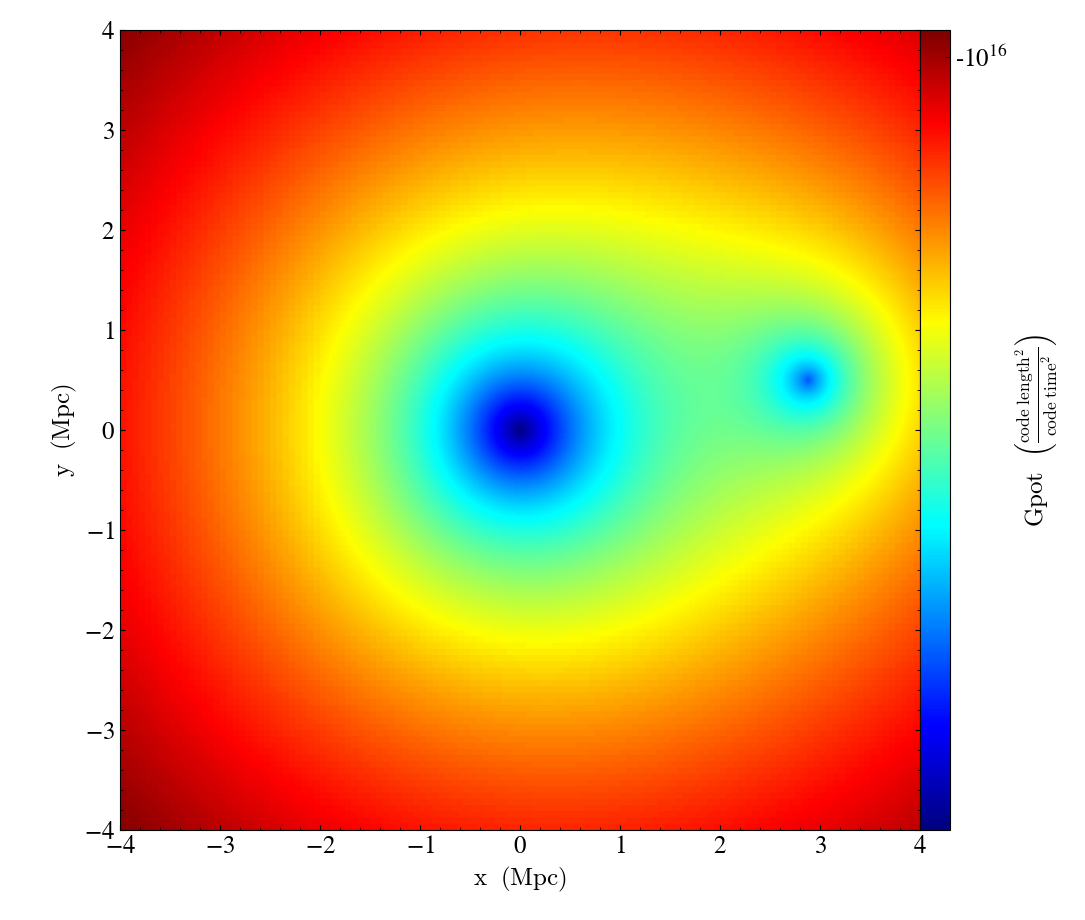

In [15]:
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','gpot')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'gpot')], 'Blue-Red')
# p.set_zlim(('flash', 'gpot'), -1e-16, -6e-16)
p.show()